# **Analysis of the intrusion Detection Evaluation Dataset(CIC-IDS2017)**
   Source of [CIC-IDS2017](https://www.unb.ca/cic/datasets/ids-2017.html)
   

## 1.The Dataset Characterstics and Exploratory Data Analysis , Data Preprocessing and the performance of each model. 
   

- **Dataset Characterstics:** Network Traffic data, Which is used to for the development and evaluation of intrusion detection systems ; are available in CIC-IDS2017 dataset. The dataset is typical of today's traffic and contains over 2.8M network packets collected in seven days in a real network . Normal traffic and seven different attack cases such as Brute Force, Heartbleed , Botnet , DoS, DDoS, Web Attack and infiltration are in the dataset. The dataset is highly imbalanced. Most of the records fall into 'Benign' class while very few records fall in the other classes . It is a dataset  with 79 columns and 2830743 rows. The number of features is 78 and 'Label' is a categorical feature (78 features are numerical in these columns).
- **Exploratory Data Analysis:** The feature values contained in this dataset have many duplicate values , and it tends to bias the machine learning model. Two columns 'Flow Bytes/s' and 'Flow Packets/s' on which there are very few number of missing values and infinite values compared to the size of the dataset which is only 0.06% (1564). The values were handled in an appropriate way.
- **Data Preprocessing:** I removed the duplicates , replaced any infinite values (Positive or Negative) by NaN(Not a number) and filled the missing values with the median. Since we have a very large dataset , the memory used is quite high for the initial of the program can crash , Then I figured  it out later by down casting data type with respect to min and max values available. Helpful for our model it would be to reduce the memory that I have used.
- **Data Analysis:** To Analyze the dataset, I grouped similar attacks and for each type of structure we looked for and found patterns in the attacks. Among the population , we took a sample(20%). I did some data analysis later which consisted of plotting  various types of charts, Correlation matrices etc. to get the relationships between features, diffetent categories of attacks present in the dataset . I analyze there are a lot of the features are strongly and even  directly correlated to other features(both positive and negative). This is an issue , such as it introduces multi collinearity extremely impacting on the machine learning models that we are going to develop later.
    Additionally , due to the large size of the original dataset which has over 70 features, training of models would require several resources at the same time. To resolve this problem,I applied PCA, or prinicipal Component Analysis , to reduce dimensions. According  to the number of components we played with: how much information we can preserve? But like "explained_variance_ratio" we have mentioned in order to keep most informations. Though it was slightly hard to reduce the dimension of information to train models. Before performing Incremental PCA we did StandardScaler.
- **Machine Learning Models:** Finally , It is worth mentoring that this dataset is highly imbalanced.Thus, we took that dataset , created a balanced  dataset  with our domain knowledge and trained and testing different ML Models using different Classification and Random Forest classifier , Decision trees and K Nearest Neighbours for multi classes classification.
  The trained models were being trained for binary classifications to identify between normal traffic and anomalous traffic. Therefore, It will only predict whether there is an intrusion or not. The anility to further extend our prediction capabilities was done, aleternatively, by using the multi class classification algorithms to identify which type of attack or intrusion is happening , For instance ,I tried doing binary classifications and to check how data stands.I later cross validated, evaluated and compared these models to find which is better or worse in this situation.
- **Performance Evaluation:** Having trained several machine learning models, we then tested what performances they had. I evaluated each model by checking its accuracy, recall, f1 score as well as confusion matrix. As we analysed the results , we could see which model performed best and which model performed best and which model had performed terrible.

## 2.Importing Necessary library  

`pandas`:This python libraries are used for Data Manipulation. <br>
`numpy` :This python libraries are used for Numerical operations.<br>
`LabelEncoder`: This Package is used for encoding categorical data.<br>
`StandardScaler`:This Package is used for normalizing features.<br>
`IncrementalPCA`:This Package is used for reducing the dimension to speed up the Model Training.<br>
`cross_val_score`: This Package is used for Model validation.<br>
`train_test_split`: This Package is used for spliting the Dataset.<br>
`LogisticRegression`,`SVC`: This Packages are used fot Classification Model.<br>
 `confusion_matrix`, `ConfusionMatrixDisplay`, `accuracy_score`, `classification_report`,\
`roc_auc_score`, `roc_curve`, `auc`, `precision_recall_curve`: These all are used for model performance evaluation.<br>
`matplotlib`and `seaborn`: This packages are used for Data visualization.


In [119]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report,\
roc_auc_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as se

## 3.Dataset Characterstics And EDA(Exploratory Data Analysis)

<h4>3.1 Loading and viewing The Dataframe: 

**The data**
**CIC-IDS2017.csv**
| Column | Description |
|--------|-------------|
| Destination_port | The port number the packet is being sent to |
| Flow_duration | Type of show |
| title | Title of the show |
| director | Director of the show |
| cast | Cast of the show |
| country | Country of origin |
| date_added | Date added to Netflix |
| release_year | Year of Netflix release |
| duration | Duration of the show in minutes |
| description | Description of the show |
| genre | Show genre |

In [120]:
#reading the dataset 
df1= pd.read_csv("Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",low_memory=True)
df2= pd.read_csv("Friday-WorkingHours-Morning.pcap_ISCX.csv",low_memory=True)
df3= pd.read_csv("Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv",low_memory=True)
df4= pd.read_csv("Monday-WorkingHours.pcap_ISCX.csv",low_memory=True)
df5= pd.read_csv("Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",low_memory=True)
df6= pd.read_csv("Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",low_memory=True)
df7= pd.read_csv("Tuesday-WorkingHours.pcap_ISCX.csv",low_memory=True)
df8= pd.read_csv("Wednesday-workingHours.pcap_ISCX.csv",low_memory=True)

In [121]:
data_list = [df1, df2, df3,df4,df5,df6,df7,df8]
print('Data dimensions: ')
for i, df in enumerate(data_list, start = 1):
  rows, cols = df.shape
  print(f'Data{i} -> {rows} rows, {cols} columns')

Data dimensions: 
Data1 -> 286467 rows, 79 columns
Data2 -> 191033 rows, 79 columns
Data3 -> 225745 rows, 79 columns
Data4 -> 529918 rows, 79 columns
Data5 -> 288602 rows, 79 columns
Data6 -> 170366 rows, 79 columns
Data7 -> 445909 rows, 79 columns
Data8 -> 692703 rows, 79 columns


In [122]:
df = pd.concat(data_list)
rows, cols = df.shape
print('New dimension:')
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')
print(f'Total cells: {rows * cols}')

New dimension:
Number of rows: 2830743
Number of columns: 79
Total cells: 223628697


In [123]:
# Deleting dataframes after concating to save memory
for d in data_list: del d

In [124]:
#checking the dataframe 
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [125]:
#Checking Datatypes 
df.dtypes

 Destination Port                int64
 Flow Duration                   int64
 Total Fwd Packets               int64
 Total Backward Packets          int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
 Idle Std                      float64
 Idle Max                        int64
 Idle Min                        int64
 Label                          object
Length: 79, dtype: object

In [126]:
#striping the spaces if any exists
column_names = {col:col.strip() for col in df.columns}
#renaming the columns
df.rename(columns = column_names, inplace=True)  
#displaying the columns if any change occured or not 
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [127]:
df.describe()

c:\Users\devan\miniconda3\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\devan\miniconda3\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,...,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,...,6.364257e+02,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.131600e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,3.204828e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


### 3.2 Data Cleaning

#### Handling Duplicate Records :

In [128]:
#printing how many duplicate records exists in dataframe
Duplicates = df[df.duplicated]
print(len(Duplicates)) #2633
df.shape  

308381


(2830743, 79)

In [129]:
#dropping the duplicate records from the dataset 
df.drop_duplicates(inplace=True)
df.shape

(2522362, 79)

#### Handling Missing Values 

In [130]:
#missing Value checking
missing_value = df.isna().sum()
print(missing_value.loc[missing_value>0])  

Flow Bytes/s    353
dtype: int64


In [131]:
#checking numeric columns 
numeric_columns = df.select_dtypes(include=[np.number]).columns
#checking infinity count in dataset
infinity_count = np.isinf(df[numeric_columns]).sum()
print(infinity_count[infinity_count>0])

Flow Bytes/s      1211
Flow Packets/s    1564
dtype: int64


In [132]:
#replacing this infinity into Nan 
df.replace([-np.inf,np.inf],np.nan,inplace=True)

In [133]:
#Checking missing values 
missing_value =df.isna().sum()
print(missing_value.loc[missing_value>0])

Flow Bytes/s      1564
Flow Packets/s    1564
dtype: int64


In [134]:
Median_flow_bytes = df['Flow Bytes/s'].median()
Median_flow_packets= df['Flow Packets/s'].median()
print(Median_flow_bytes , Median_flow_packets)

3715.0378579999997 69.742244285


In [135]:
df['Flow Bytes/s'].fillna(Median_flow_bytes,inplace=True)
df['Flow Packets/s'].fillna(Median_flow_packets,inplace=True)

C:\Users\devan\AppData\Local\Temp\ipykernel_1724\2747691155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Flow Bytes/s'].fillna(Median_flow_bytes,inplace=True)
C:\Users\devan\AppData\Local\Temp\ipykernel_1724\2747691155.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



 ### 3.3 Analysing this with the help of visualization

#### Visualizing Column Correlation:

In [136]:
#unique Values
df['Label'].unique()

array(['BENIGN', 'PortScan', 'Bot', 'DDoS', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [137]:
#count of unique values
df['Label'].value_counts()

Label
BENIGN                        2096484
DoS Hulk                       172849
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [138]:
# Creating a dictionary that maps each label to its attack type
attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'Port Scan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Web Attack � Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

# Creating a new column 'Attack Type' in the DataFrame based on the attack_map dictionary
df['Attack Type'] = df['Label'].map(attack_map)

In [139]:
lable = LabelEncoder()
df['Attack Number']= lable.fit_transform(df['Attack Type'])
df['Attack Number'].value_counts()

Attack Number
0    2096484
4     193748
3     128016
7      90819
2       9152
8       2143
1       1953
6         36
5         11
Name: count, dtype: int64

In [140]:
df.drop('Label', axis = 1, inplace = True)

In [141]:
encoded_values = df['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}:{lable.inverse_transform([val])[0]}")

0:BENIGN
1:Bot
2:Brute Force
3:DDoS
4:DoS
5:Heartbleed
6:Infiltration
7:Port Scan
8:Web Attack


Correlation Matrix

In [142]:
corr_matrix = df.corr(numeric_only = True).round(2)
(corr_matrix)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Attack Number
Destination Port,1.00,-0.17,-0.00,-0.00,0.01,-0.00,0.09,-0.05,0.14,0.12,...,0.0,-0.04,-0.05,-0.06,-0.03,-0.13,0.01,-0.12,-0.13,-0.13
Flow Duration,-0.17,1.00,0.02,0.02,0.06,0.02,0.26,-0.12,0.13,0.22,...,-0.0,0.18,0.24,0.29,0.12,0.76,0.24,0.78,0.73,0.21
Total Fwd Packets,-0.00,0.02,1.00,1.00,0.37,1.00,0.01,-0.00,-0.00,0.00,...,-0.0,0.04,0.01,0.03,0.04,0.00,0.00,0.00,0.00,-0.00
Total Backward Packets,-0.00,0.02,1.00,1.00,0.36,0.99,0.01,-0.00,-0.00,0.00,...,0.0,0.04,0.01,0.03,0.04,0.00,0.00,0.00,0.00,-0.00
Total Length of Fwd Packets,0.01,0.06,0.37,0.36,1.00,0.35,0.20,-0.00,0.19,0.16,...,-0.0,0.10,0.10,0.13,0.07,0.02,0.03,0.02,0.02,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Idle Mean,-0.13,0.76,0.00,0.00,0.02,0.00,0.17,-0.08,0.12,0.17,...,-0.0,0.12,0.03,0.08,0.11,1.00,0.15,0.99,0.99,0.38
Idle Std,0.01,0.24,0.00,0.00,0.03,0.00,0.18,-0.03,0.18,0.19,...,-0.0,0.07,0.08,0.07,0.04,0.15,1.00,0.28,0.01,0.08
Idle Max,-0.12,0.78,0.00,0.00,0.02,0.00,0.19,-0.08,0.14,0.19,...,-0.0,0.13,0.05,0.10,0.12,0.99,0.28,1.00,0.96,0.38
Idle Min,-0.13,0.73,0.00,0.00,0.02,0.00,0.15,-0.07,0.10,0.15,...,-0.0,0.11,0.02,0.07,0.11,0.99,0.01,0.96,1.00,0.38


In [143]:
corr_matrix.style.background_gradient(cmap = 'coolwarm',axis = None).format(precision= 2)

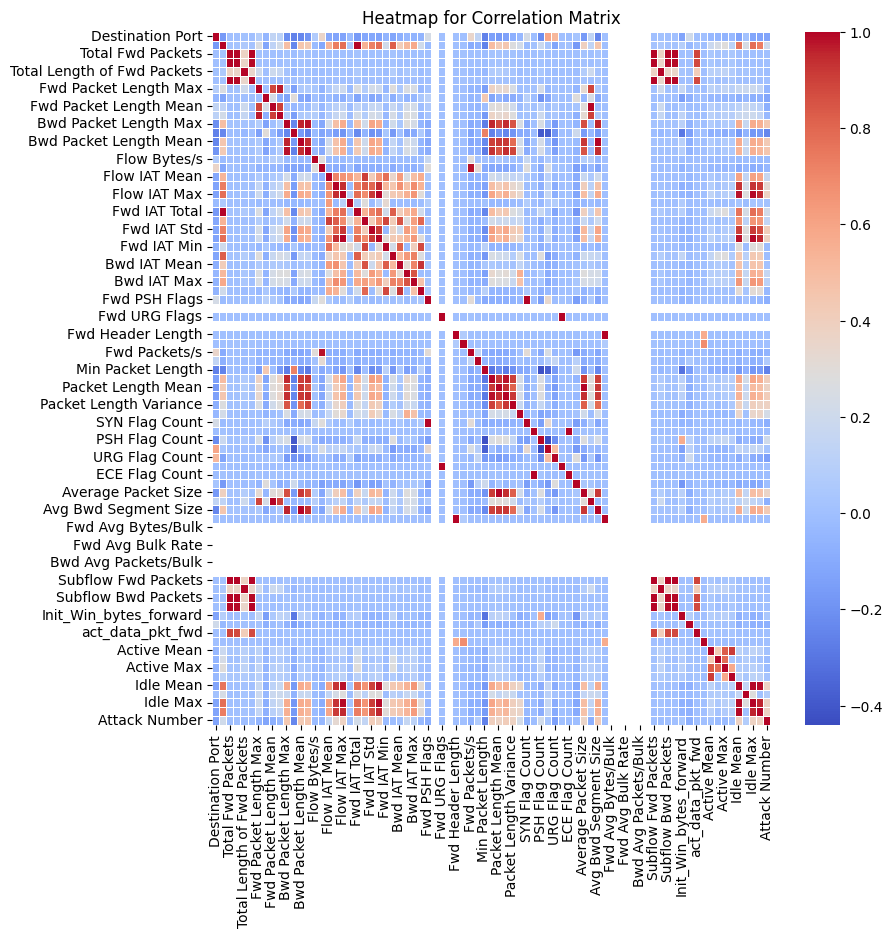

In [144]:
fig = plt.subplots(figsize = (9,9))
se.heatmap(corr_matrix,cmap='coolwarm',annot = False,linewidth=0.5)
#Giving Title to Heatmap
plt.title("Heatmap for Correlation Matrix")
plt.show()

In [145]:
#ignoring negative nan values from correlation matrix
pos_corr = corr_matrix['Attack Number'][(corr_matrix['Attack Number']>0)&(corr_matrix['Attack Number']<1)].index.tolist()  
for i,features in enumerate(pos_corr,start=1):
    corr_value = corr_matrix.loc[features,'Attack Number']
    print (f"{i}. {features}: {corr_value}")

1. Flow Duration: 0.21
2. Bwd Packet Length Max: 0.44
3. Bwd Packet Length Mean: 0.43
4. Bwd Packet Length Std: 0.45
5. Flow IAT Mean: 0.17
6. Flow IAT Std: 0.33
7. Flow IAT Max: 0.38
8. Flow IAT Min: 0.01
9. Fwd IAT Total: 0.22
10. Fwd IAT Mean: 0.15
11. Fwd IAT Std: 0.41
12. Fwd IAT Max: 0.38
13. Bwd IAT Mean: 0.01
14. Bwd IAT Std: 0.16
15. Bwd IAT Max: 0.12
16. Bwd Packets/s: 0.07
17. Max Packet Length: 0.4
18. Packet Length Mean: 0.37
19. Packet Length Std: 0.41
20. Packet Length Variance: 0.38
21. FIN Flag Count: 0.23
22. PSH Flag Count: 0.21
23. ACK Flag Count: 0.03
24. Average Packet Size: 0.36
25. Avg Bwd Segment Size: 0.43
26. Init_Win_bytes_forward: 0.04
27. Active Mean: 0.01
28. Active Min: 0.02
29. Idle Mean: 0.38
30. Idle Std: 0.08
31. Idle Max: 0.38
32. Idle Min: 0.38


In [146]:
std = df.std(numeric_only = True)
zero_std = std[std==0].index.tolist()
print(zero_std)

['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']


In [147]:

numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()


#### Visualization of linear Relationships of features

In [148]:
sample_size = int(0.5*len(df))
sample_data = df.sample(n=sample_size,replace=False,random_state=0)
sample_data.shape

(1261181, 80)

In [149]:
print(f"{'Feature':<32}{'Original Dataset':<22}{'Sampled Dataset':<22}Variation Percentage")
print('-'*96)
high_variation = []
for cols in numeric_columns:
    old = df[cols].describe().loc['mean']
    new = sample_data[cols].describe().loc['mean']
    if old==0 :
        percentage = 0
    else:
        percentage=abs((new-old)/old)
    if percentage*100 > 5:
        high_variation.append((cols,percentage*100))
        print(f"{cols:<32}{old:<22.6f}{new:<22.6f}{percentage:<.2%}")
        

Feature                         Original Dataset      Sampled Dataset       Variation Percentage
------------------------------------------------------------------------------------------------
Fwd URG Flags                   0.000032              0.000029              10.00%
Fwd Header Length               -29182.101016         -19766.721115         32.26%
Bwd Header Length               -2553.643801          -2808.913209          10.00%
CWE Flag Count                  0.000032              0.000029              10.00%
Fwd Header Length.1             -29182.101016         -19766.721115         32.26%


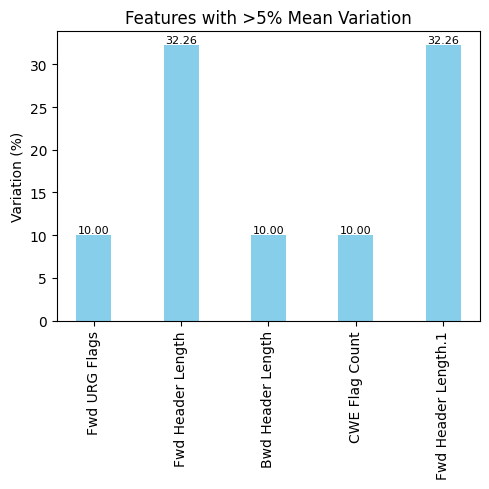

In [150]:
labels, values = zip(*high_variation)

plt.figure(figsize=(5,5))
plt.bar(labels, values, width=0.4,color='skyblue')
plt.xticks(rotation=90)
plt.ylabel('Variation (%)')
plt.title('Features with >5% Mean Variation')

for i in range(len(labels)):
    plt.text(i, values[i], f"{values[i]:.2f}", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [151]:
corr_matrix = sample_data.corr(numeric_only = True).round(2)
corr_matrix.style.background_gradient(cmap = 'coolwarm',axis = None).format(precision= 2)


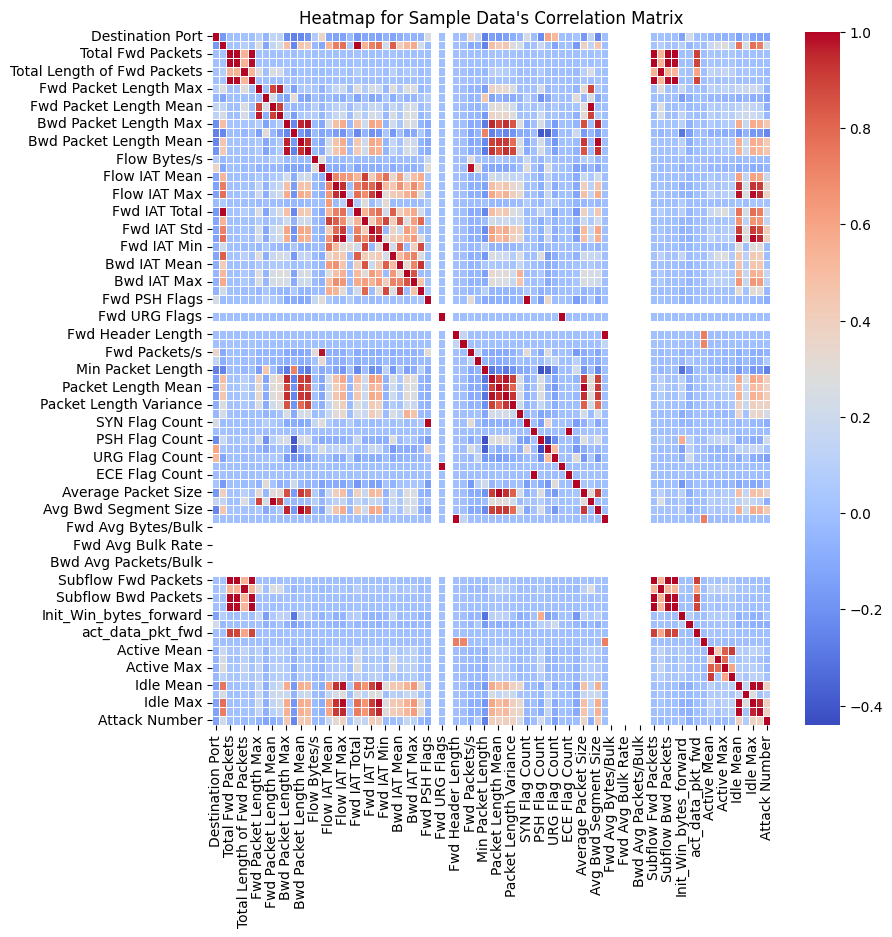

In [152]:
fig = plt.subplots(figsize = (9,9))
se.heatmap(corr_matrix,cmap='coolwarm',annot = False,linewidth=0.5)
#Giving Title to Heatmap
plt.title("Heatmap for Sample Data's Correlation Matrix")
plt.show()

In [ ]:
# Plotting the pairs of strongly positive correlated features in the sampled_data that have a correlation coefficient of 0.85 or higher
cols = list(sample_data.columns)[:-2]
high_corr_pairs = []
corr_th = 0.85

for i in range(len(cols)):
  for j in range(i + 1, len(cols)):
    val = sample_data[cols[i]].corr(sample_data[cols[j]])
    # If the correlation coefficient is NaN or below the threshold, skip to the next pair
    if np.isnan(val) or val < corr_th:
      continue
    high_corr_pairs.append((val, cols[i], cols[j]))

size, cols = len(high_corr_pairs), 4
rows, rem =  size // cols, size % cols
if rem:
  rows += 1

fig, axs = plt.subplots(rows, cols, figsize = (24, int(size * 1.7)))
for i in range(rows):
    for j in range(cols):
      try:
        val, x, y = high_corr_pairs[i * cols + j]
        if val > 0.99:
          axs[i, j].scatter(sample_data[x], sample_data[y], color = 'green', alpha = 0.1)
        else:
          axs[i, j].scatter(sample_data[x], sample_data[y], color = 'blue', alpha = 0.1)
        axs[i, j].set_xlabel(x)
        axs[i, j].set_ylabel(y)
        axs[i, j].set_title(f'{x} vs\n{y} ({val:.2f})')
      except IndexError:
        fig.delaxes(axs[i, j])

fig.tight_layout()
plt.show()

NameError: name 'sampled_data' is not defined

In [ ]:
sample_data.drop('Attack Number', axis = 1, inplace = True)
df.drop('Attack Number', axis = 1, inplace = True)


In [ ]:
#identifying the Outliers 
numeric_data = sample_data.select_dtypes(include = ['float', 'int'])
q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
iqr = q3 - q1
outlier = (numeric_data < (q1 - 1.5 * iqr)) | (numeric_data > (q3 + 1.5 * iqr))
outlier_count = outlier.sum()
outlier_percentage = round(outlier.mean() * 100, 2)
outlier_stats = pd.concat([outlier_count, outlier_percentage], axis = 1)
outlier_stats.columns = ['Outlier Count', 'Outlier Percentage']
print(outlier_stats)

                             Outlier Count  Outlier Percentage
Destination Port                    273732               21.70
Flow Duration                       234228               18.57
Total Fwd Packets                   126321               10.02
Total Backward Packets              119536                9.48
Total Length of Fwd Packets         157452               12.48
...                                    ...                 ...
Active Min                          279525               22.16
Idle Mean                           283733               22.50
Idle Std                            114854                9.11
Idle Max                            283733               22.50
Idle Min                            283733               22.50

[78 rows x 2 columns]


In [ ]:
# Identifying outliers based on attack type
outlier_counts = {}
for i in numeric_data:
    for attack_type in sample_data['Attack Type'].unique():
        attack_data = sample_data[i][sample_data['Attack Type'] == attack_type]
        q1, q3 = np.percentile(attack_data, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        num_outliers = ((attack_data < lower_bound) | (attack_data > upper_bound)).sum()
        outlier_percent = num_outliers / len(attack_data) * 100
        outlier_counts[(i, attack_type)] = (num_outliers, outlier_percent)
for i in numeric_data:
  print(f'Feature: {i}')
  for attack_type in sample_data['Attack Type'].unique():
    num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
    print(f'{attack_type}: {num_outliers} ({outlier_percent:.2f}%)')
  print()

Feature: Destination Port
BENIGN: 234976 (22.42%)
DoS: 0 (0.00%)
DDoS: 3 (0.00%)
Port Scan: 5491 (12.07%)
Brute Force: 0 (0.00%)
Web Attack: 0 (0.00%)
Bot: 338 (35.17%)
Infiltration: 0 (0.00%)
Heartbleed: 0 (0.00%)

Feature: Flow Duration
BENIGN: 243402 (23.23%)
DoS: 21270 (21.94%)
DDoS: 10985 (17.09%)
Port Scan: 1028 (2.26%)
Brute Force: 1071 (23.75%)
Web Attack: 151 (14.21%)
Bot: 2 (0.21%)
Infiltration: 0 (0.00%)
Heartbleed: 1 (20.00%)

Feature: Total Fwd Packets
BENIGN: 194813 (18.59%)
DoS: 1244 (1.28%)
DDoS: 1987 (3.09%)
Port Scan: 722 (1.59%)
Brute Force: 0 (0.00%)
Web Attack: 158 (14.86%)
Bot: 28 (2.91%)
Infiltration: 2 (11.11%)
Heartbleed: 0 (0.00%)

Feature: Total Backward Packets
BENIGN: 150372 (14.35%)
DoS: 11256 (11.61%)
DDoS: 0 (0.00%)
Port Scan: 260 (0.57%)
Brute Force: 0 (0.00%)
Web Attack: 94 (8.84%)
Bot: 28 (2.91%)
Infiltration: 2 (11.11%)
Heartbleed: 0 (0.00%)

Feature: Total Length of Fwd Packets
BENIGN: 203237 (19.39%)
DoS: 25322 (26.12%)
DDoS: 11774 (18.32%)
Port Sc

#### Visualizing Categorical Variable

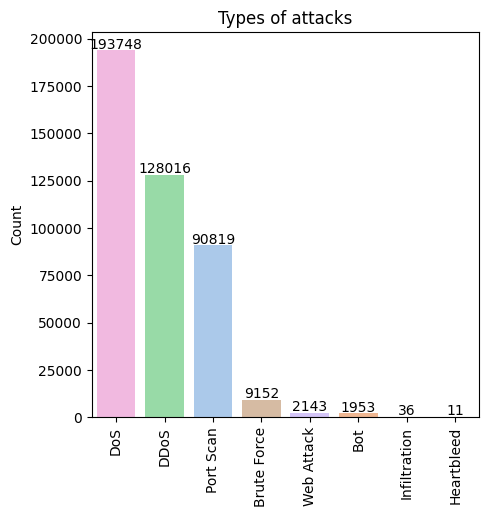

In [ ]:
# Different 'Attack Type' in the main dataset excluding 'BENIGN'
attacks = df.loc[df['Attack Type'] != 'BENIGN']
plt.figure(figsize = (5, 5))
ax = se.countplot(x= 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index,hue='Attack Type',legend=False)
plt.title('Types of attacks')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height() + 1000), ha = 'center')
plt.show()

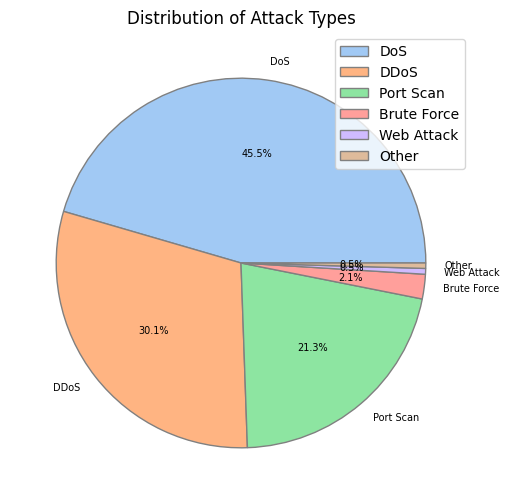

In [ ]:
attack_counts = attacks['Attack Type'].value_counts()
threshold = 0.005
percentages = attack_counts / attack_counts.sum()
small_slices = percentages[percentages < threshold].index.tolist()
attack_counts['Other'] = attack_counts[small_slices].sum()
attack_counts.drop(small_slices, inplace = True)

se.set_palette('pastel')
plt.figure(figsize = (6,6))
plt.pie(attack_counts.values, labels = attack_counts.index, autopct = '%1.1f%%', textprops={'fontsize':7},wedgeprops={'edgecolor':'grey'})
plt.title('Distribution of Attack Types')
plt.legend(attack_counts.index, loc = 'best')
plt.show()

In [ ]:
df.groupby('Attack Type').first()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Attack Type,,,,,,,,,,,,,,,,,,,,,
BENIGN,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,24,32,0.0,0.00000,0,0,0.0,0.00000,0,0
Bot,8080,60202640,9,9,322,256,322,0,35.777778,107.333333,...,1,32,63678.2,22252.53596,103175,50911,10200000.0,34941.27201,10200000,10100000
Brute Force,80,5216127,3,1,0,0,0,0,0.000000,0.000000,...,0,32,0.0,0.00000,0,0,0.0,0.00000,0,0
DDoS,80,1293792,3,7,26,11607,20,0,8.666667,10.263203,...,2,20,0.0,0.00000,0,0,0.0,0.00000,0,0
DoS,80,5169956,8,6,1101,4222,410,0,137.625000,185.758628,...,7,20,0.0,0.00000,0,0,0.0,0.00000,0,0
Heartbleed,444,119302728,2685,1729,8299,7556917,517,0,3.090875,16.858421,...,118,32,2217.0,0.00000,2217,2217,5024984.0,0.00000,5024984,5024984
Infiltration,444,42664070,5,6,141,291,93,0,28.200000,38.861292,...,4,20,0.0,0.00000,0,0,0.0,0.00000,0,0
Port Scan,80,5021059,6,5,703,1414,356,0,117.166667,181.536131,...,2,32,0.0,0.00000,0,0,0.0,0.00000,0,0
Web Attack,80,5185118,7,7,1022,2321,372,0,146.000000,184.078788,...,3,32,0.0,0.00000,0,0,0.0,0.00000,0,0


## 4.Data Preprocessing

### Preprocessing

In [ ]:
# For improving performance and reduce memory-related errors
old_memory_usage = df.memory_usage().sum() / 1024 ** 2
print(f'Initial memory usage: {old_memory_usage:.2f} MB')
for col in df.columns:
    col_type = df[col].dtype
    if col_type != object:
        c_min = df[col].min()
        c_max = df[col].max()
        # Downcasting float64 to float32
        if str(col_type).find('float') >= 0 and c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
            df[col] = df[col].astype(np.float32)

        # Downcasting int64 to int32
        elif str(col_type).find('int') >= 0 and c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
            df[col] = df[col].astype(np.int32)

new_memory_usage = df.memory_usage().sum() / 1024 ** 2
print(f"Final memory usage: {new_memory_usage:.2f} MB")

Initial memory usage: 1539.53 MB
Final memory usage: 808.25 MB


In [ ]:
print(f'Reduced memory usage: {1 - (new_memory_usage / old_memory_usage):.2%}')

Reduced memory usage: 47.50%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2522362 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int32  
 1   Flow Duration                int32  
 2   Total Fwd Packets            int32  
 3   Total Backward Packets       int32  
 4   Total Length of Fwd Packets  int32  
 5   Total Length of Bwd Packets  int32  
 6   Fwd Packet Length Max        int32  
 7   Fwd Packet Length Min        int32  
 8   Fwd Packet Length Mean       float32
 9   Fwd Packet Length Std        float32
 10  Bwd Packet Length Max        int32  
 11  Bwd Packet Length Min        int32  
 12  Bwd Packet Length Mean       float32
 13  Bwd Packet Length Std        float32
 14  Flow Bytes/s                 float32
 15  Flow Packets/s               float32
 16  Flow IAT Mean                float32
 17  Flow IAT Std                 float32
 18  Flow IAT Max                 int32  
 19  Flow I

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Destination Port,2522362.0,8.704762e+03,1.902507e+04,0.0,53.0,80.0,443.00,65535.0
Flow Duration,2522362.0,1.658132e+07,3.522426e+07,-13.0,208.0,50577.0,5329717.25,119999998.0
Total Fwd Packets,2522362.0,1.027627e+01,7.941738e+02,1.0,2.0,2.0,6.00,219759.0
Total Backward Packets,2522362.0,1.156596e+01,1.056594e+03,0.0,1.0,2.0,5.00,291922.0
Total Length of Fwd Packets,2522362.0,6.115751e+02,1.058499e+04,0.0,12.0,66.0,332.00,12900000.0
...,...,...,...,...,...,...,...,...
Active Min,2522362.0,6.542300e+04,6.109712e+05,0.0,0.0,0.0,0.00,110000000.0
Idle Mean,2522362.0,9.331577e+06,2.484157e+07,0.0,0.0,0.0,0.00,120000000.0
Idle Std,2522362.0,5.654432e+05,4.872678e+06,0.0,0.0,0.0,0.00,76900000.0
Idle Max,2522362.0,9.757716e+06,2.561067e+07,0.0,0.0,0.0,0.00,120000000.0


In [ ]:
# Dropping columns with only one unique value
num_unique = df.nunique()
one_variable = num_unique[num_unique == 1]
not_one_variable = num_unique[num_unique > 1].index

dropped_cols = one_variable.index
df = df[not_one_variable]

print('Dropped columns:')
dropped_cols

Dropped columns:


Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk',
       'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
       'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')

In [ ]:
df.shape

(2522362, 71)

In [ ]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',

### Applying PCA for Performance Tuning

In [ ]:
features = df.drop('Attack Type', axis = 1)
attacks = df['Attack Type']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
df['Attack Type']

0         BENIGN
1         BENIGN
2         BENIGN
3         BENIGN
4         BENIGN
           ...  
692698    BENIGN
692699    BENIGN
692700    BENIGN
692701    BENIGN
692702    BENIGN
Name: Attack Type, Length: 2522362, dtype: object

In [ ]:
size = len(features.columns) // 2
ipca = IncrementalPCA(n_components = size, batch_size = 500)
for batch in np.array_split(scaled_features, len(features) // 500):
    ipca.partial_fit(batch)

print(f'information retained: {sum(ipca.explained_variance_ratio_):.2%}')

information retained: 99.23%


In [ ]:
transformed_features = ipca.transform(scaled_features)
new_data = pd.DataFrame(transformed_features, columns = [f'PC{i+1}' for i in range(size)])
new_data['Attack Type'] = attacks.values
new_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,Attack Type
0,-1.114465,0.267761,-0.941916,0.364180,-0.908770,0.715800,0.128272,1.069475,-1.303455,-0.413396,...,-0.002341,-0.034706,0.039755,0.396494,-0.220890,-0.000747,0.087354,0.151917,0.129700,BENIGN
1,-1.113451,0.267720,-0.941272,0.364492,-0.908999,0.716466,0.128294,1.069145,-1.303910,-0.413976,...,-0.001656,-0.034756,0.039487,0.396570,-0.220859,-0.000748,0.087115,0.151737,0.129742,BENIGN
2,-2.097375,-0.053832,0.377751,-0.075849,1.136101,0.084590,-0.002784,-0.664587,-0.858715,2.056647,...,-0.004701,-1.718288,0.919951,-0.636969,0.006411,-0.000019,-0.064695,0.063654,0.114975,BENIGN
3,-1.110336,0.268795,-0.943531,0.371980,-0.910522,0.712342,0.128206,1.070057,-1.302735,-0.413037,...,-0.003735,-0.035901,0.039399,0.397777,-0.222717,-0.000731,0.083501,0.148275,0.133038,BENIGN
4,-2.242243,-0.048254,0.423215,0.197730,1.664973,-0.196594,-0.017547,-0.819338,-0.864090,2.696099,...,0.216766,-0.360404,0.350831,0.057954,-0.031171,-0.000862,-0.041204,0.060764,0.052777,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522357,-1.966994,-0.034718,0.214177,-0.550060,-0.715281,-0.255954,-0.028814,-0.395633,0.253434,-0.399602,...,-0.296987,-0.081804,0.269539,-0.118128,-0.023775,-0.000088,0.117892,-0.417063,-0.330048,BENIGN
2522358,-1.967205,-0.034833,0.140573,-0.769734,-1.329709,-1.050005,-0.084010,-0.676166,1.052829,-0.349889,...,0.177496,0.145997,0.015569,-0.228897,-0.504103,-0.003227,0.002380,-0.006170,-0.005359,BENIGN
2522359,-2.177555,-0.044131,0.882373,1.291510,4.456004,0.141289,-0.035235,0.677040,1.469922,-0.910803,...,-0.032229,1.552529,-0.119844,0.612749,0.068834,0.000524,0.113276,-0.042950,-0.249257,BENIGN
2522360,-1.906970,-0.035756,0.236811,-0.648822,-0.915051,-0.480384,-0.047542,-0.496974,0.535684,-0.471504,...,-0.168386,0.065884,0.364221,-0.256613,-0.352119,-0.001812,0.070594,-0.266350,-0.246263,BENIGN


## 5.Building a Machine Learning Models

### Creating a balanced dataset for Binary Classification

In [ ]:
normal_traffic = new_data.loc[new_data['Attack Type'] == 'BENIGN']
intrusions = new_data.loc[new_data['Attack Type'] != 'BENIGN']

normal_traffic = normal_traffic.sample(n = len(intrusions), replace = False)

ids_data = pd.concat([intrusions, normal_traffic])
ids_data['Attack Type'] = np.where((ids_data['Attack Type'] == 'BENIGN'), 0, 1)
bc_data = ids_data.sample(n = 15000)

print(bc_data['Attack Type'].value_counts())

Attack Type
1    7648
0    7352
Name: count, dtype: int64


In [ ]:
X_bc = bc_data.drop('Attack Type', axis = 1)
y_bc = bc_data['Attack Type']
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size = 0.25, random_state = 0)

### Logistic Regression

#### Logistic Regression Model 1

In [ ]:
lr1 = LogisticRegression(max_iter = 10000, C = 0.1, random_state = 0, solver = 'saga')
lr1.fit(X_train_bc, y_train_bc)
cv_lr1 = cross_val_score(lr1, X_train_bc, y_train_bc, cv = 5)
print('Logistic regression Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_lr1)))
print(f'\nMean cross-validation score: {cv_lr1.mean():.2f}')

Logistic regression Model 1

Cross-validation scores: 0.9306666666666666, 0.9288888888888889, 0.9222222222222223, 0.9293333333333333, 0.9253333333333333

Mean cross-validation score: 0.93


In [ ]:
print('Logistic Regression Model 1 coefficients:')
print(*lr1.coef_, sep = ', ')
print('\nLogistic Regression Model 1 intercept:', *lr1.intercept_)

Logistic Regression Model 1 coefficients:
[ 0.43506577 -0.22887411 -0.49038694 -2.22082268  0.65017     1.10716756
  0.02629939  0.34619529 -0.19685946  0.21696873  0.03016419 -0.00415938
 -0.14723533  0.59968334  0.50099492  0.02267962 -0.02043439 -0.6661909
 -0.40088055  0.51322466 -0.44445362 -0.53607002  0.78494884  1.67922123
 -0.54439115 -1.34345114 -1.39955556 -0.1864746  -0.75484356  0.82801826
 -0.80606049  0.00371503 -2.37707674  0.07304789  2.66021216]

Logistic Regression Model 1 intercept: -3.018328874226994


#### Logistic Regression Model 2

In [ ]:
lr2 = LogisticRegression(max_iter = 15000, solver = 'sag', C = 100, random_state = 0)
lr2.fit(X_train_bc, y_train_bc)
cv_lr2 = cross_val_score(lr2, X_train_bc, y_train_bc, cv = 5)
print('Logistic regression Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_lr2)))
print(f'\nMean cross-validation score: {cv_lr2.mean():.2f}')

Logistic regression Model 2

Cross-validation scores: 0.9395555555555556, 0.9386666666666666, 0.9311111111111111, 0.9417777777777778, 0.9426666666666667

Mean cross-validation score: 0.94


In [ ]:
print('Logistic Regression Model 2 coefficients:')
print(*lr2.coef_, sep = ', ')
print('\nLogistic Regression Model 2 intercept:', *lr2.intercept_)

Logistic Regression Model 2 coefficients:
[ 5.96098150e-01 -1.93088491e-01 -7.69269504e-01 -2.90493444e+00
  1.02933549e+00  1.15756467e+00 -4.23827239e-03  6.03581354e-01
  1.97745499e-01  4.09951654e-01  1.48698064e-01 -7.23657006e-02
 -6.41206972e-02  1.67714486e+00  1.20782001e+00  1.90071469e-01
 -2.78751583e-02 -9.09223315e-01 -2.01538076e-01  6.26014178e-01
 -1.65116628e-01 -8.35231741e-01  5.89092039e-01  2.43916236e+00
 -1.69650475e+00 -1.66984531e+00 -2.45725316e+00 -3.93636126e-01
 -8.53864576e-01  1.96836397e+00 -8.53669319e-01  1.80894302e-02
 -5.01209139e+00 -1.13544654e+00  5.19430131e+00]

Logistic Regression Model 2 intercept: -3.6924006996326364


### Support Vector Machine

#### SVM Model 1

In [ ]:
svm1 = SVC(kernel = 'poly', C = 1, random_state = 0, probability = True)
svm1.fit(X_train_bc, y_train_bc)

cv_svm1 = cross_val_score(svm1, X_train_bc, y_train_bc, cv = 5)
print('Support Vector Machine Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_svm1)))
print(f'\nMean cross-validation score: {cv_svm1.mean():.2f}')


Support Vector Machine Model 1

Cross-validation scores: 0.9111111111111111, 0.8955555555555555, 0.892, 0.9066666666666666, 0.8902222222222222

Mean cross-validation score: 0.90


#### SVM Model 2

In [ ]:
svm2 = SVC(kernel = 'rbf', C = 1, gamma = 0.1, random_state = 0, probability = True)
svm2.fit(X_train_bc, y_train_bc)

cv_svm2 = cross_val_score(svm2, X_train_bc, y_train_bc, cv = 5)
print('Support Vector Machine Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_svm2)))
print(f'\nMean cross-validation score: {cv_svm2.mean():.2f}')

Support Vector Machine Model 2

Cross-validation scores: 0.9675555555555555, 0.9675555555555555, 0.9577777777777777, 0.9675555555555555, 0.9653333333333334

Mean cross-validation score: 0.97


In [ ]:
print('SVM Model 1 intercept:', *svm1.intercept_)
print('SVM Model 2 intercept:', *svm2.intercept_)

SVM Model 1 intercept: -0.593258119381928
SVM Model 2 intercept: -0.4419291999120433


## 6.Performance Evaluation

### Logistic Regression Model 1 Vs Model 2

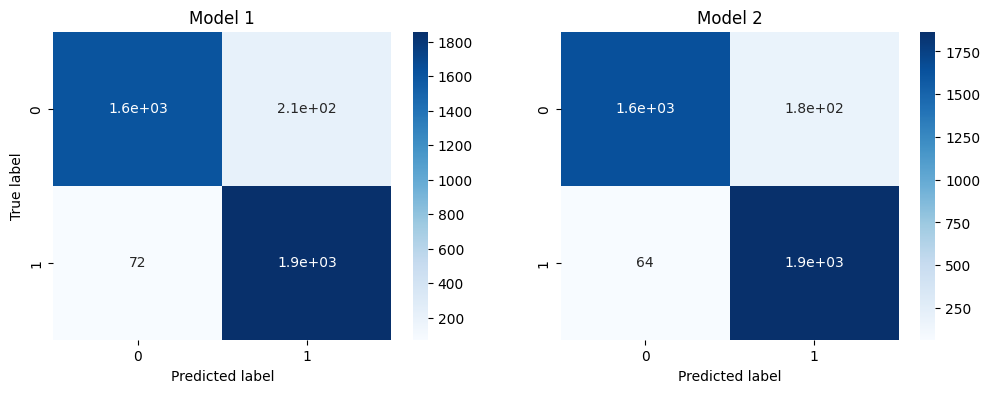

In [ ]:
y_pred_lr1 = lr1.predict(X_test_bc)
y_pred_lr2 = lr2.predict(X_test_bc)

conf_matrix_model1 = confusion_matrix(y_test_bc, y_pred_lr1)
conf_matrix_model2 = confusion_matrix(y_test_bc, y_pred_lr2)

fig, axs = plt.subplots(1, 2, figsize = (12, 4))

se.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0])
axs[0].set_title('Model 1')

se.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1])
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')
plt.show()

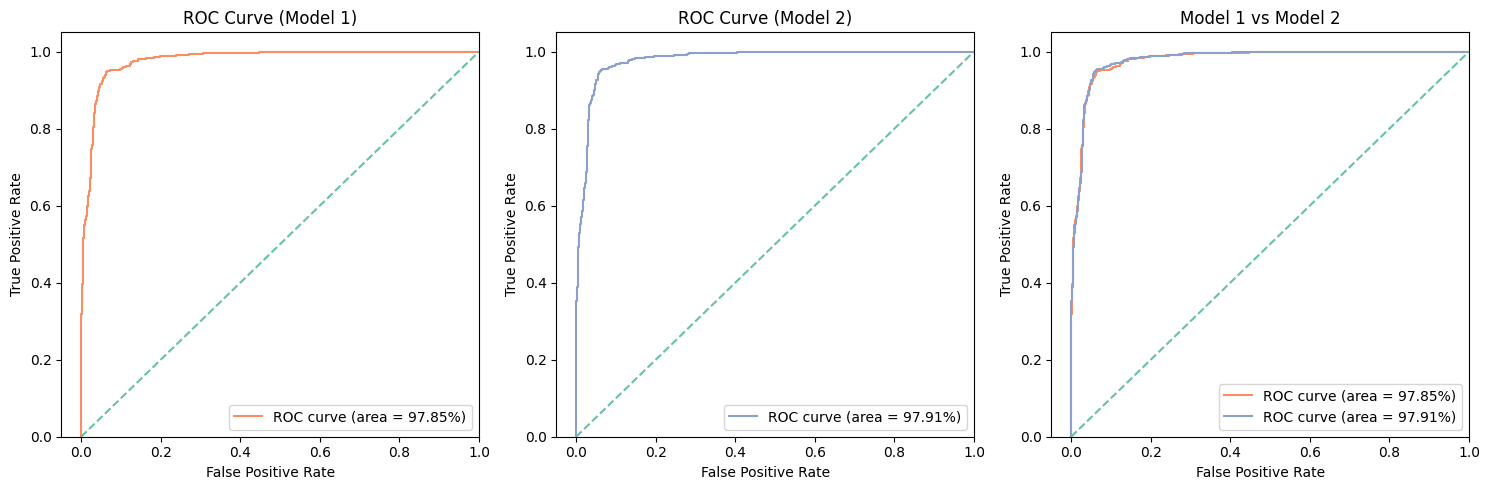

In [ ]:
y_prob_lr1 = lr1.predict_proba(X_test_bc)[:,1]
y_prob_lr2 = lr2.predict_proba(X_test_bc)[:,1]

fpr1, tpr1, _ = roc_curve(y_test_bc, y_prob_lr1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test_bc, y_prob_lr2)
roc_auc2 = auc(fpr2, tpr2)

colors = se.color_palette('Set2', n_colors = 3)
fig, axes = plt.subplots(1, 3, figsize = (15, 5))

axes[0].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[0].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[0].set_xlim([-0.05, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve (Model 1)')
axes[0].legend(loc = 'lower right')

axes[1].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[1].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[1].set_xlim([-0.05, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve (Model 2)')
axes[1].legend(loc = 'lower right')

axes[2].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[2].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[2].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[2].set_xlim([-0.05, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('Model 1 vs Model 2')
axes[2].legend(loc = 'lower right')

plt.tight_layout()
plt.show()

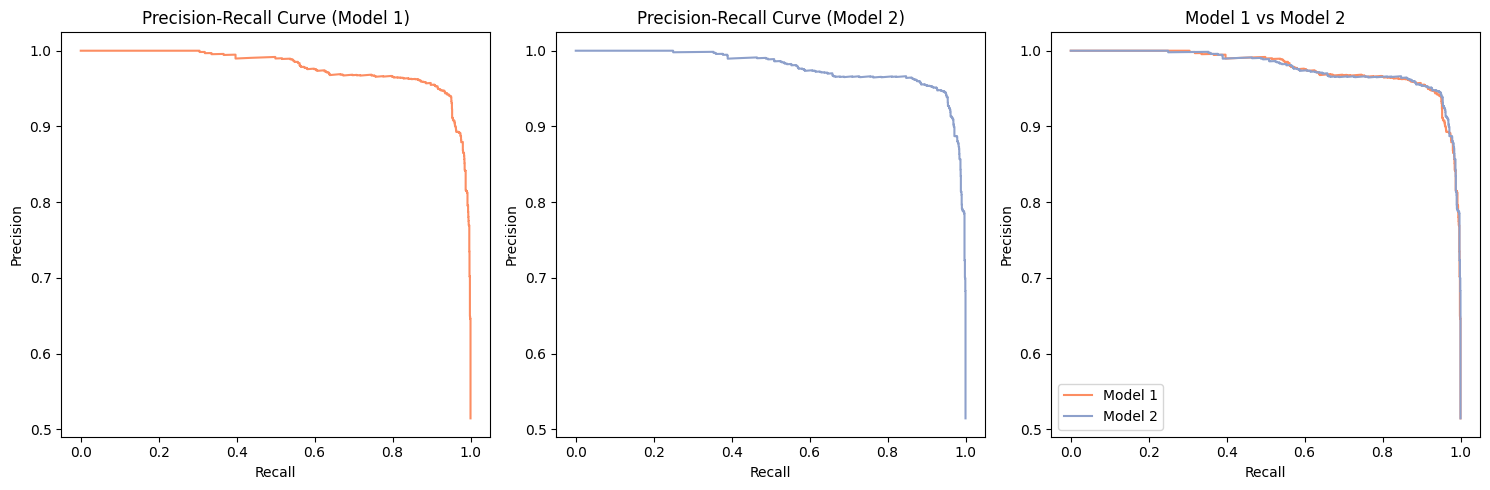

In [ ]:
precision1, recall1, threshold1 = precision_recall_curve(y_test_bc, y_prob_lr1)
precision2, recall2, threshold2 = precision_recall_curve(y_test_bc, y_prob_lr2)

fig, axs = plt.subplots(1, 3, figsize = (15, 5))

axs[0].plot(recall1, precision1, color = colors[1], label = 'Model 1')
axs[0].set_xlabel('Recall')
axs[0].set_ylabel('Precision')
axs[0].set_title('Precision-Recall Curve (Model 1)')

axs[1].plot(recall2, precision2, color = colors[2], label = 'Model 2')
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].set_title('Precision-Recall Curve (Model 2)')

axs[2].plot(recall1, precision1, color = colors[1], label = 'Model 1')
axs[2].plot(recall2, precision2, color = colors[2], label = 'Model 2')
axs[2].set_xlabel('Recall')
axs[2].set_ylabel('Precision')
axs[2].set_title('Model 1 vs Model 2')
axs[2].legend(loc = 'lower left')

plt.tight_layout()
plt.show()

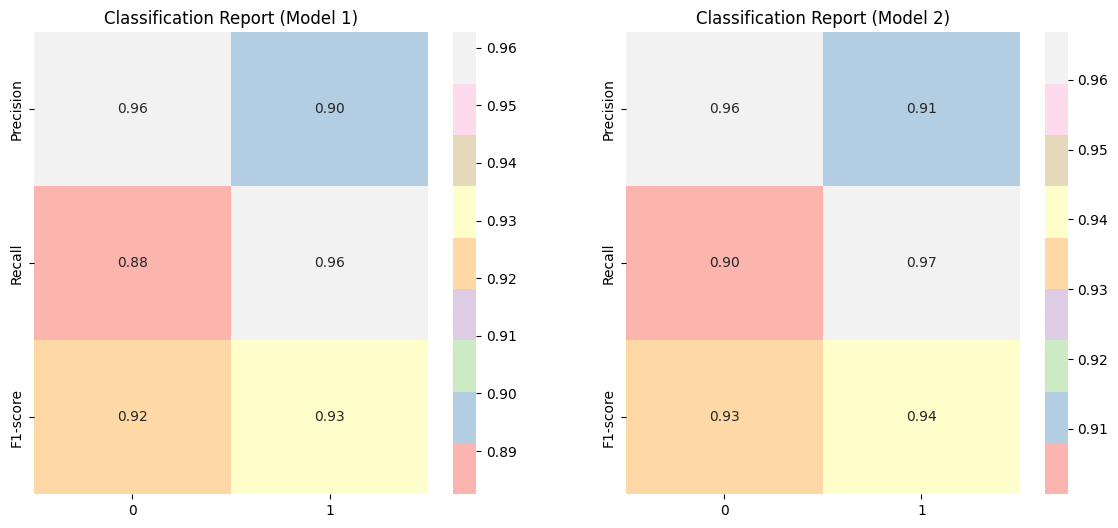

In [ ]:
target_names = lr1.classes_
metrics1 = classification_report(y_true = y_test_bc, y_pred = y_pred_lr1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test_bc, y_pred = y_pred_lr2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
se.heatmap(data1, cmap='Pastel1', annot = True, fmt='.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
se.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
plt.show()

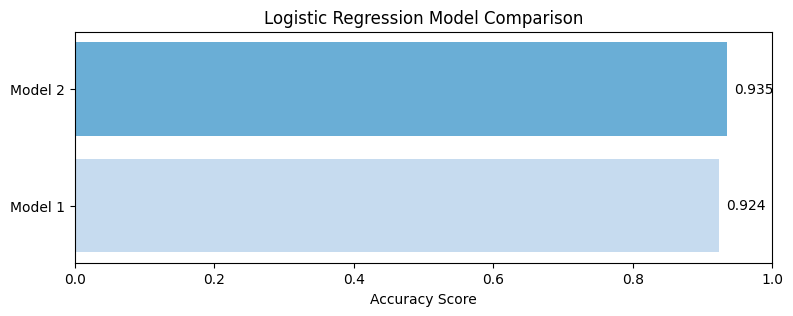

In [ ]:
palette = se.color_palette('Blues', n_colors = 3)

acc1 = accuracy_score(y_pred_lr1, y_test_bc)
acc2 = accuracy_score(y_pred_lr2, y_test_bc)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Logistic Regression Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

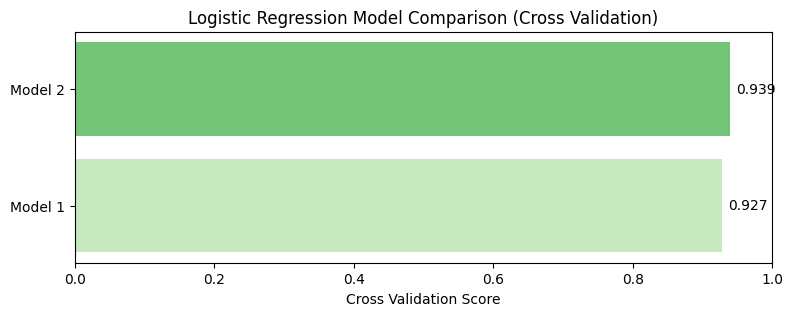

In [ ]:
palette = se.color_palette('Greens', n_colors = 3)

labels = ['Model 1', 'Model 2']
scores = [cv_lr1.mean(), cv_lr2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Logistic Regression Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

### Support Vector Machine Model 1 Vs Model 2

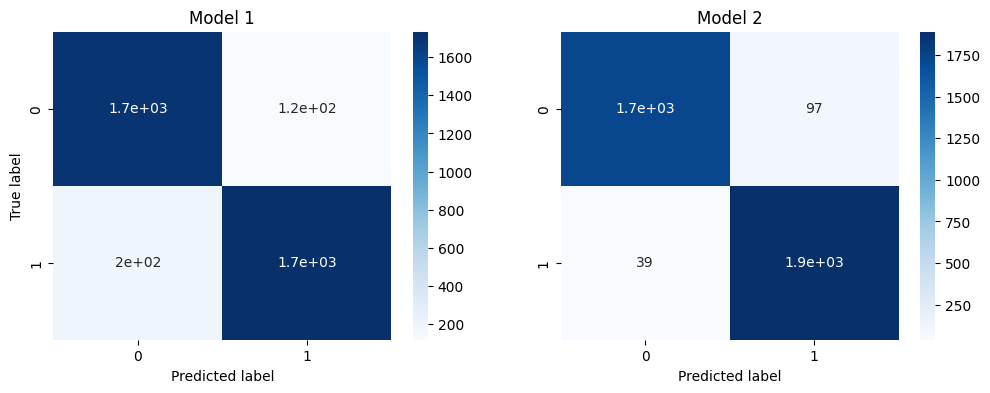

In [ ]:
y_pred_svm1 = svm1.predict(X_test_bc)
y_pred_svm2 = svm2.predict(X_test_bc)

conf_matrix_model1 = confusion_matrix(y_test_bc, y_pred_svm1)
conf_matrix_model2 = confusion_matrix(y_test_bc, y_pred_svm2)

fig, axs = plt.subplots(1, 2, figsize = (12, 4))

se.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0])
axs[0].set_title('Model 1')

se.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1])
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')
plt.show()

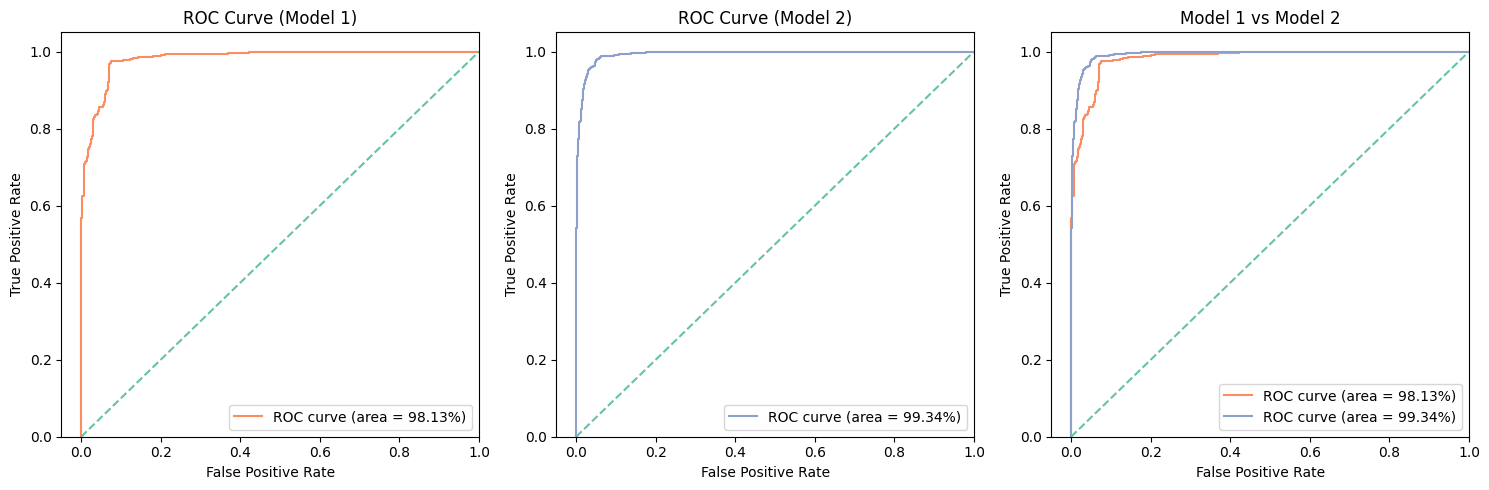

In [ ]:
y_prob_svm1 = svm1.predict_proba(X_test_bc)[:,1]
y_prob_svm2 = svm2.predict_proba(X_test_bc)[:,1]

fpr1, tpr1, _ = roc_curve(y_test_bc, y_prob_svm1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test_bc, y_prob_svm2)
roc_auc2 = auc(fpr2, tpr2)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))

axes[0].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[0].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[0].set_xlim([-0.05, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve (Model 1)')
axes[0].legend(loc = 'lower right')

axes[1].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[1].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[1].set_xlim([-0.05, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve (Model 2)')
axes[1].legend(loc = 'lower right')

axes[2].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[2].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[2].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[2].set_xlim([-0.05, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('Model 1 vs Model 2')
axes[2].legend(loc = 'lower right')

plt.tight_layout()
plt.show()

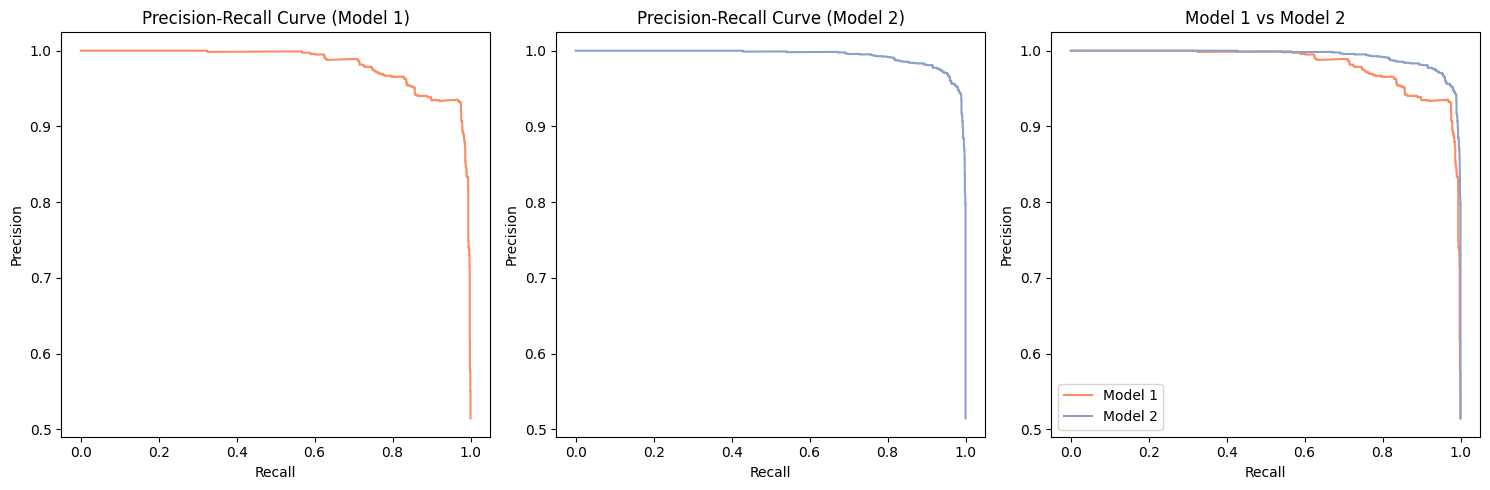

In [ ]:
precision1, recall1, threshold1 = precision_recall_curve(y_test_bc, y_prob_svm1)
precision2, recall2, threshold2 = precision_recall_curve(y_test_bc, y_prob_svm2)

fig, axs = plt.subplots(1, 3, figsize = (15, 5))

axs[0].plot(recall1, precision1, color = colors[1])
axs[0].set_xlabel('Recall')
axs[0].set_ylabel('Precision')
axs[0].set_title('Precision-Recall Curve (Model 1)')

axs[1].plot(recall2, precision2, color = colors[2])
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].set_title('Precision-Recall Curve (Model 2)')

axs[2].plot(recall1, precision1, color = colors[1], label = 'Model 1')
axs[2].plot(recall2, precision2, color = colors[2], label = 'Model 2')
axs[2].set_xlabel('Recall')
axs[2].set_ylabel('Precision')
axs[2].set_title('Model 1 vs Model 2')
axs[2].legend(loc = 'lower left')

plt.tight_layout()
plt.show()

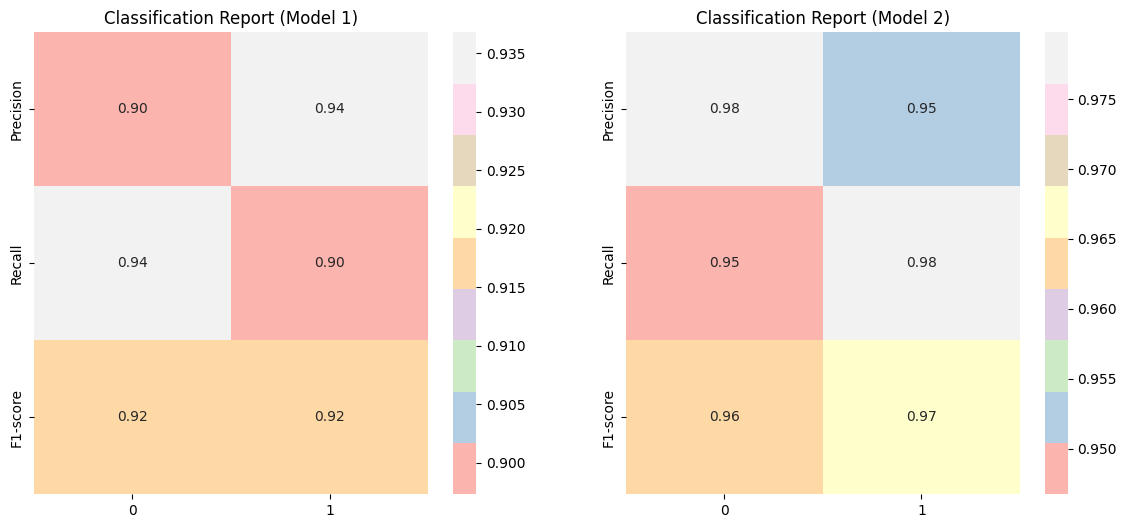

In [ ]:
target_names = svm1.classes_
metrics1 = classification_report(y_true = y_test_bc, y_pred = y_pred_svm1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test_bc, y_pred = y_pred_svm2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
se.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
se.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
plt.show()

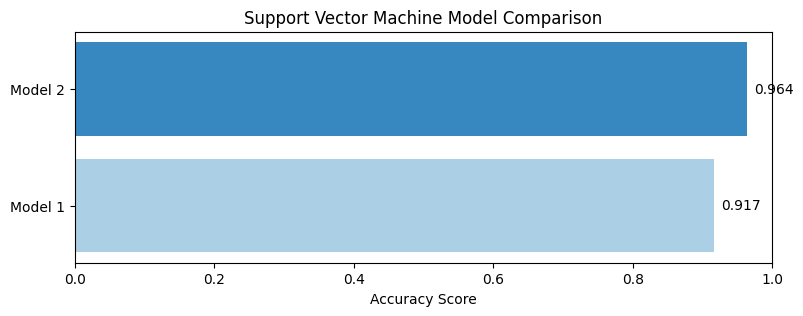

In [ ]:
palette = se.color_palette('Blues', n_colors = 2)

acc1 = accuracy_score(y_pred_svm1, y_test_bc)
acc2 = accuracy_score(y_pred_svm2, y_test_bc)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Support Vector Machine Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

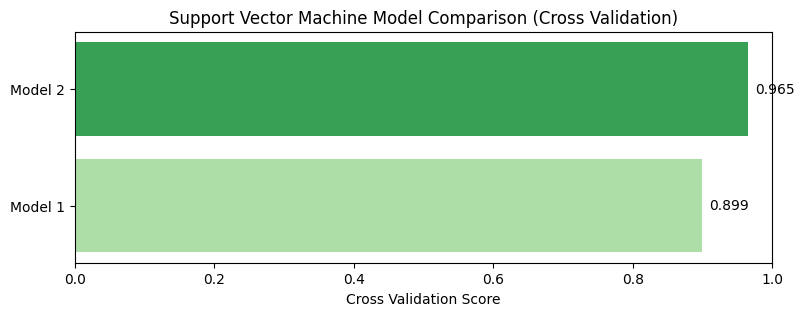

In [ ]:
palette = se.color_palette('Greens', n_colors = 2)

labels = ['Model 1', 'Model 2']
scores = [cv_svm1.mean(), cv_svm2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Support Vector Machine Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

### Logistic Regression Vs SVM .

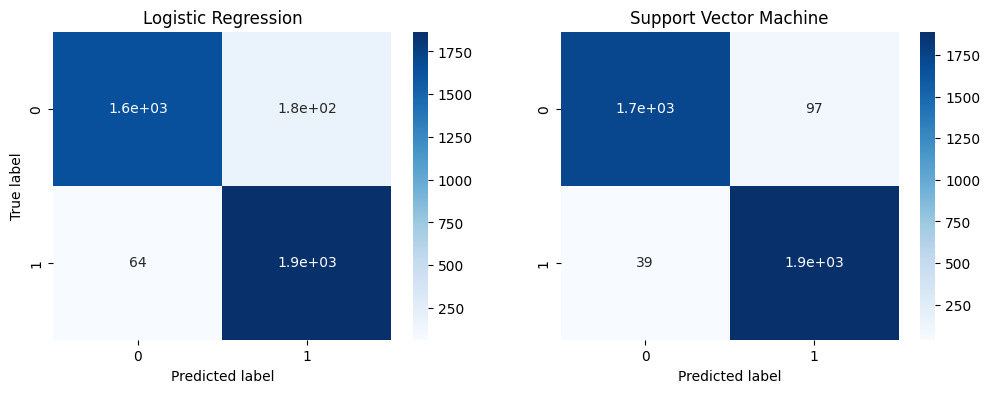

In [ ]:
conf_matrix_model1 = confusion_matrix(y_test_bc, y_pred_lr2)
conf_matrix_model2 = confusion_matrix(y_test_bc, y_pred_svm2)

fig, axs = plt.subplots(1, 2, figsize = (12, 4))

se.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0])
axs[0].set_title('Logistic Regression')

se.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1])
axs[1].set_title('Support Vector Machine')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')
plt.show()

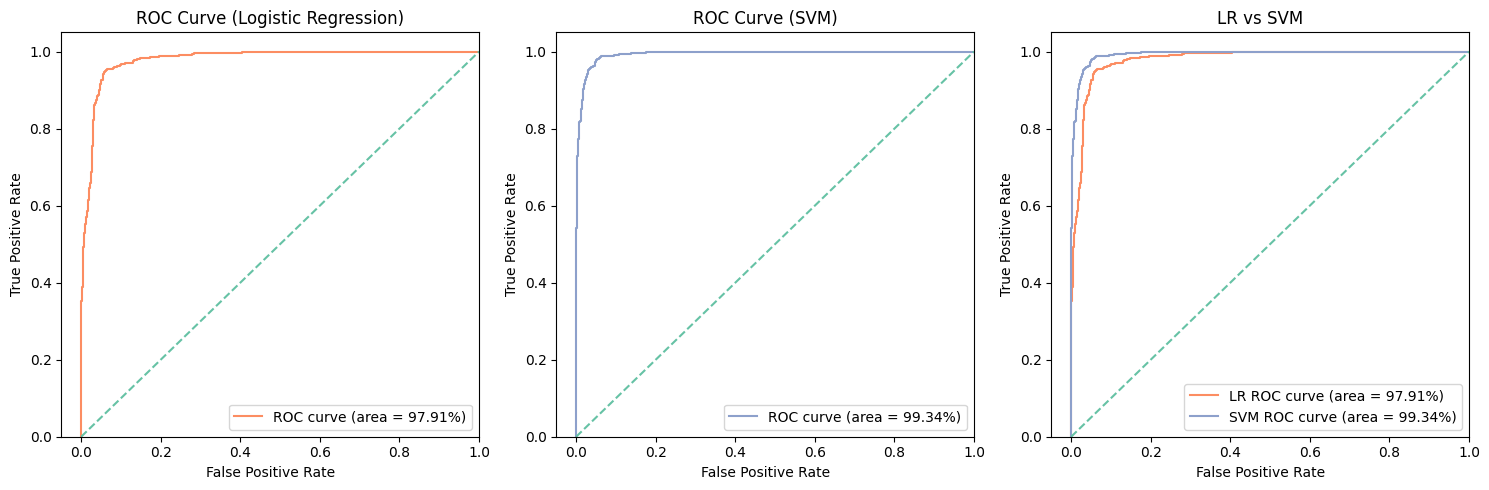

In [ ]:
fpr1, tpr1, _ = roc_curve(y_test_bc, y_prob_lr2)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test_bc, y_prob_svm2)
roc_auc2 = auc(fpr2, tpr2)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))

axes[0].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[0].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[0].set_xlim([-0.05, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve (Logistic Regression)')
axes[0].legend(loc = 'lower right')

axes[1].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[1].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[1].set_xlim([-0.05, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve (SVM)')
axes[1].legend(loc = 'lower right')

axes[2].plot(fpr1, tpr1, label = f'LR ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[2].plot(fpr2, tpr2, label = f'SVM ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[2].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[2].set_xlim([-0.05, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('LR vs SVM')
axes[2].legend(loc = 'lower right')

plt.tight_layout()
plt.show()

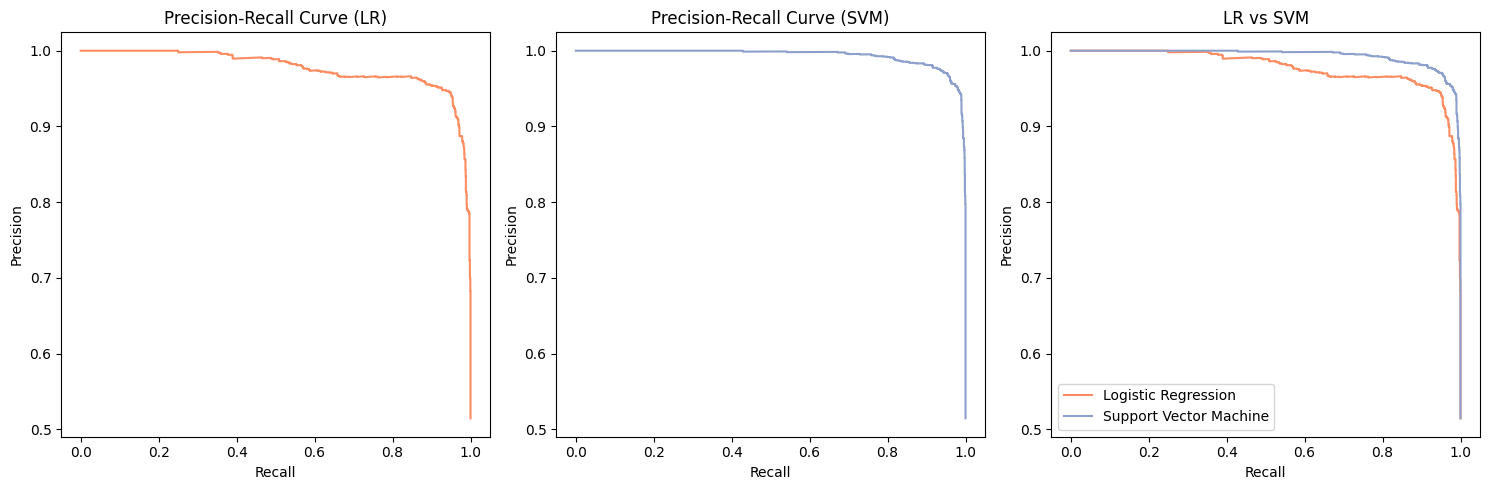

In [ ]:
precision1, recall1, threshold1 = precision_recall_curve(y_test_bc, y_prob_lr2)
precision2, recall2, threshold2 = precision_recall_curve(y_test_bc, y_prob_svm2)

fig, axs = plt.subplots(1, 3, figsize = (15, 5))

axs[0].plot(recall1, precision1, color = colors[1], label = 'Model 1')
axs[0].set_xlabel('Recall')
axs[0].set_ylabel('Precision')
axs[0].set_title('Precision-Recall Curve (LR)')

axs[1].plot(recall2, precision2, color = colors[2], label = 'Model 2')
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].set_title('Precision-Recall Curve (SVM)')

axs[2].plot(recall1, precision1, color = colors[1], label = 'Logistic Regression')
axs[2].plot(recall2, precision2, color = colors[2], label = 'Support Vector Machine')
axs[2].set_xlabel('Recall')
axs[2].set_ylabel('Precision')
axs[2].set_title('LR vs SVM')
axs[2].legend(loc = 'lower left')

plt.tight_layout()
plt.show()

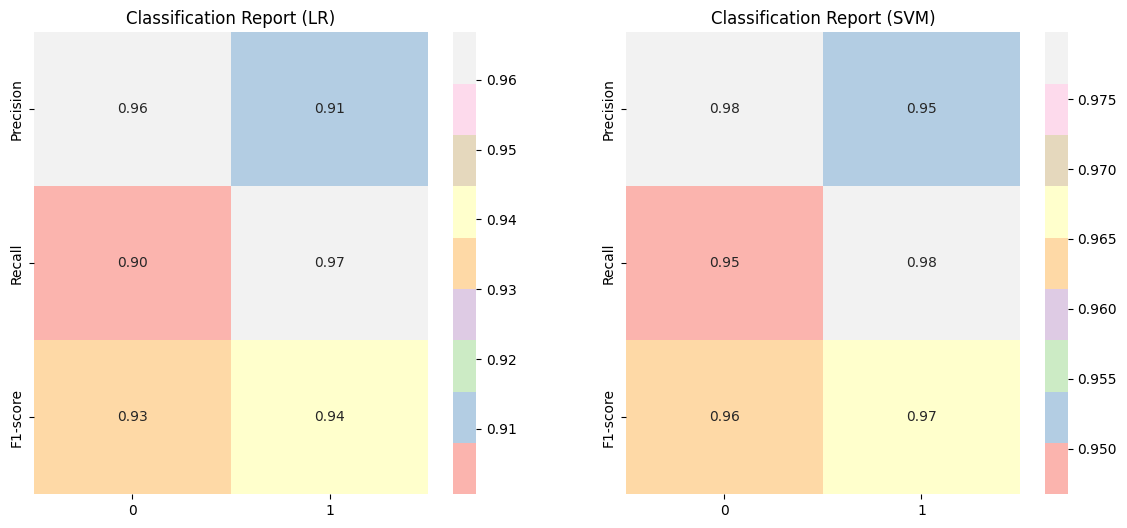

In [ ]:
target_names = svm2.classes_
metrics1 = classification_report(y_true = y_test_bc, y_pred = y_pred_lr2, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test_bc, y_pred = y_pred_svm2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
se.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax=axs[0])
se.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax=axs[1])
axs[0].set_title('Classification Report (LR)')
axs[1].set_title('Classification Report (SVM)')
plt.show()

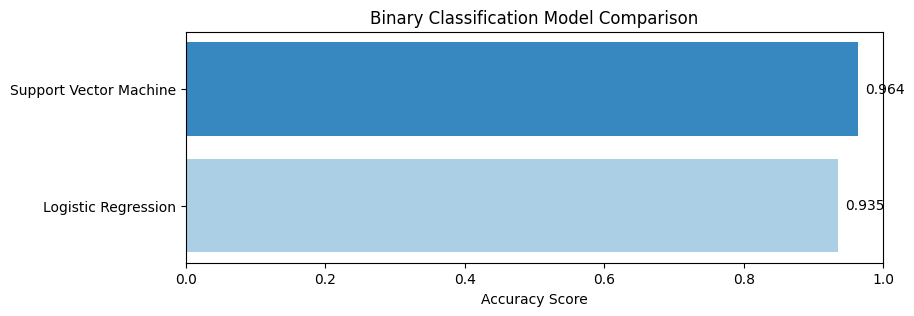

In [ ]:
palette = se.color_palette('Blues', n_colors = 2)

acc1 = accuracy_score(y_pred_lr2, y_test_bc)
acc2 = accuracy_score(y_pred_svm2, y_test_bc)

labels = ['Logistic Regression', 'Support Vector Machine']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Binary Classification Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')
plt.show()

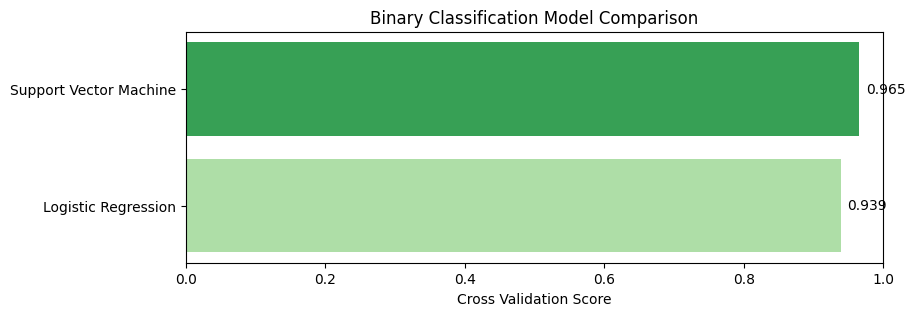

In [ ]:
palette = se.color_palette('Greens', n_colors = 2)

labels = ['Logistic Regression', 'Support Vector Machine']
scores = [cv_lr2.mean(), cv_svm2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Binary Classification Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()